<a href="https://colab.research.google.com/github/Sannya-Wasim/Dice_AI_Course/blob/main/Assignment_02_Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 02**


## Task 01
In this assignment, our objective is to develop a fundamental CNN model using TensorFlow for classifying images. The dataset comprises three digit classes: 0, 1, and 2. For this particular task, I have opted to construct the LeNet model from scratch.

### **Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

import tensorflow as tf
from sklearn.utils import shuffle

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

from sklearn.model_selection import train_test_split


%matplotlib inline

### **Loading Dataset**

In [3]:
!unzip /content/drive/MyDrive/data_assignment_2.zip -d /content/drive/MyDrive

Archive:  /content/drive/MyDrive/data_assignment_2.zip
replace /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1_1696577963902MNIST_IMAGE_TRAIN.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1_1696577963902MNIST_IMAGE_TRAIN.jpg  
replace /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_10_1696577993537MNIST_IMAGE_TEST.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_10_1696577993537MNIST_IMAGE_TEST.jpg  
  inflating: /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1000_1696577964314MNIST_IMAGE_TRAIN.jpg  
  inflating: /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1001_1696577994040MNIST_IMAGE_TEST.jpg  
  inflating: /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1009_1696577994044MNIST_IMAGE_TEST.jpg  
  

In [4]:
dataset_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits'

In [6]:
image_size = (100, 100)

In [12]:
# Generate batches of tensor image data with real-time data augmentation
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 3728 images belonging to 3 classes.
Found 930 images belonging to 3 classes.


### **Some details about the dataset**

In [45]:
class_labels = train_generator.class_indices
class_labels

{'0_digits': 0, '1_digits': 1, '2_digits': 2}

### **Creating our model**

In [31]:
# https://datahacker.rs/lenet-5-implementation-tensorflow-2-0/
# https://www.youtube.com/watch?v=PiF0l6xif-k
model = tf.keras.Sequential([
    # 1st Convolution Layer
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation="relu", input_shape=(100,100,3)),

    # Average Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'),

    # 2nd Convolution Layer
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'),

    # Average Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'),

    # Flatten
    tf.keras.layers.Flatten(),

    # 1st Fully Connected Layer
    tf.keras.layers.Dense(units=120, activation='relu'),

    # Flatten
    tf.keras.layers.Flatten(),

    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(units=84, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [32]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.optimizers.SGD(learning_rate=0.001))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 6)         456       
                                                                 
 average_pooling2d_3 (Avera  (None, 48, 48, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 16)        2416      
                                                                 
 average_pooling2d_4 (Avera  (None, 22, 22, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

### **Training the Model**

In [34]:
model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 10
)

Epoch 1/10
117/117 [==============================] - 10s 74ms/step - loss: 0.8103 - accuracy: 0.7940 - val_loss: 0.4348 - val_accuracy: 0.9194
Epoch 2/10
117/117 [==============================] - 9s 76ms/step - loss: 0.2397 - accuracy: 0.9472 - val_loss: 0.1591 - val_accuracy: 0.9516
Epoch 3/10
117/117 [==============================] - 10s 83ms/step - loss: 0.1323 - accuracy: 0.9616 - val_loss: 0.1120 - val_accuracy: 0.9624
Epoch 4/10
117/117 [==============================] - 9s 73ms/step - loss: 0.1087 - accuracy: 0.9624 - val_loss: 0.1260 - val_accuracy: 0.9516
Epoch 5/10
117/117 [==============================] - 10s 83ms/step - loss: 0.0777 - accuracy: 0.9769 - val_loss: 0.1017 - val_accuracy: 0.9634
Epoch 6/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0679 - accuracy: 0.9785 - val_loss: 0.1179 - val_accuracy: 0.9538
Epoch 7/10
117/117 [==============================] - 8s 71ms/step - loss: 0.0666 - accuracy: 0.9791 - val_loss: 0.0715 - val_accuracy: 0.9

In [35]:
model.save('LeNet.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Testing our model**

In [36]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def predict_image(image_path, model, class_labels):
  img = image.load_img(image_path, target_size=(100,100))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img= preprocess_input(img)
  prediction = model.predict(img)
  return prediction[0]


1/1 [==============================] - 0s 18ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1176_1696577994113MNIST_IMAGE_TEST.jpg
Predicted class : 0
Confidence score : 0.9964739680290222


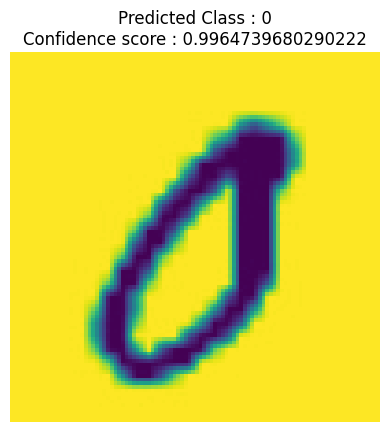

In [46]:
# Prediction 0 digit class
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1176_1696577994113MNIST_IMAGE_TEST.jpg'
prediction = predict_image(image_path, model, class_labels)

# Get the predicted class label and confidence score
predicted_class= np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted class : {predicted_class}")
print(f"Confidence score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence score : {confidence_score}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 19ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/1_digits/image_1240_1696577994137MNIST_IMAGE_TEST.jpg
Predicted class : 1
Confidence score : 0.9760614633560181


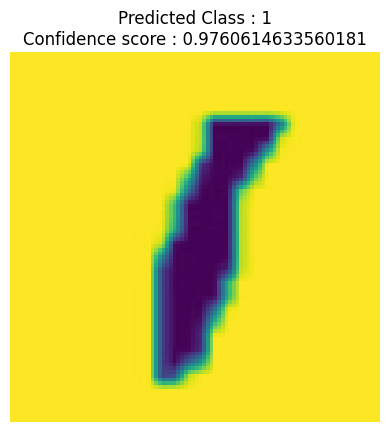

In [47]:
# Prediction 1 digit class
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/1_digits/image_1240_1696577994137MNIST_IMAGE_TEST.jpg'
prediction = predict_image(image_path, model, class_labels)

# Get the predicted class label and confidence score
predicted_class= np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted class : {predicted_class}")
print(f"Confidence score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence score : {confidence_score}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 21ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/2_digits/image_3362_1696577965279MNIST_IMAGE_TRAIN.jpg
Predicted class : 2
Confidence score : 0.9997568726539612


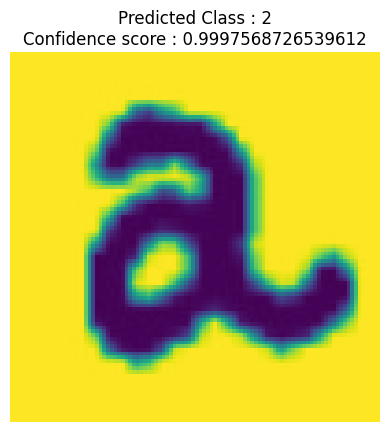

In [48]:
# Prediction 2 digit class
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/2_digits/image_3362_1696577965279MNIST_IMAGE_TRAIN.jpg'
prediction = predict_image(image_path, model, class_labels)

# Get the predicted class label and confidence score
predicted_class= np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted class : {predicted_class}")
print(f"Confidence score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence score : {confidence_score}")
plt.axis('off')
plt.show()